## Introduction

This is a jupyter notebook an interactive "literate" programming interface/gui. you can read more on what are jupyter notebooks and the basics of working with them in the [tutorial](https://realpython.com/jupyter-notebook-introduction/) one our of many

In [79]:
!pip install pandas scikit-learn sklearn matplotlib seaborn
# Note: when we need to run a command from the terminal which isn't a pure python command we'll prefix with !

Looking in indexes: https://pypi.org/simple, https://repo.fury.io/RJN6sFDizvNyhqzPBvun/idoivri/
You should consider upgrading via the 'pip install --upgrade pip' command.


In [80]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn



In [81]:
# Constants
dataset_uri = "https://github.com/ThisIsIsaac/Data-Science-for-COVID-19/raw/master/Covid19_Dataset/patients.csv"

In [82]:
# Pandas has a concept of a dataframe, one can initialize a dataframe from csv/json most other kind of tables. 
# and yes, from a remote uri that has this data also 
# df = pd.read_csv(dataset_uri)
df = pd.read_csv('./PatientInfo.csv')

In [83]:
# Pandas is built for exploring datasets, Lets take a look
print(df.shape)
df.describe()

(2771, 18)


,patient_id,global_num,birth_year,infection_order,infected_by,contact_number
count,2.771000e+03,1664.000000,2414.000000,31.000000,6.500000e+02,517.000000
mean,3.748468e+09,5558.304087,1974.374896,2.387097,2.647075e+09,20.849130
std,2.209410e+09,3142.434246,20.284689,1.453213,1.687647e+09,81.595859
min,1.000000e+09,1.000000,1916.000000,1.000000,1.000000e+09,0.000000
25%,1.400000e+09,2693.500000,1960.000000,1.000000,1.200000e+09,2.000000
50%,4.100000e+09,6344.500000,1974.000000,2.000000,2.000000e+09,5.000000
75%,6.001001e+09,8268.250000,1993.000000,3.000000,4.100000e+09,15.000000
max,7.000000e+09,9652.000000,2020.000000,6.000000,6.100000e+09,1160.000000


In [84]:
# Also we can take a peek inside
df.head(10)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
5,1000000006,10.0,female,1966.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,3.0,1.000000e+09,43.0,NaN,2020-01-31,2020-02-19,NaN,released
6,1000000007,11.0,male,1995.0,20s,Korea,Seoul,Jongno-gu,NaN,contact with patient,3.0,1.000000e+09,0.0,NaN,2020-01-31,2020-02-10,NaN,released
7,1000000008,13.0,male,1992.0,20s,Korea,Seoul,etc,NaN,overseas inflow,1.0,NaN,0.0,NaN,2020-02-02,2020-02-24,NaN,released
8,1000000009,19.0,male,1983.0,30s,Korea,Seoul,Songpa-gu,NaN,overseas inflow,2.0,NaN,68.0,NaN,2020-02-05,2020-02-21,NaN,released
9,1000000010,21.0,female,1960.0,60s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,3.0,1.000000e+09,6.0,NaN,2020-02-05,2020-02-29,NaN,released


In [85]:
# Not sure about the variance of available values in a specific column? lets explore it
print('disease unique values')
print(df.disease.unique())


print('infection_case unique values')
print(df.infection_case.unique())

disease unique values
[nan True]
infection_case unique values
['overseas inflow' 'contact with patient' 'Seongdong-gu APT' 'etc'
 "Eunpyeong St. Mary's Hospital" 'Shincheonji Church' 'Dongan Church'
 'Guro-gu Call Center' 'Onchun Church' 'Cheongdo Daenam Hospital'
 'Suyeong-gu Kindergarten' nan 'Ministry of Oceans and Fisheries'
 'gym facility in Cheonan' 'gym facility in Sejong'
 'River of Grace Community Church' 'Gyeongsan Seorin Nursing Home'
 'Gyeongsan Cham Joeun Community Center' 'Gyeongsan Jeil Silver Town'
 'Bonghwa Pureun Nursing Home' 'Pilgrimage to Israel' 'Geochang Church'
 'Changnyeong Coin Karaoke']


In [86]:
# It seems we can extract a common group - infection reason is domestic or abroad
# We'll build an function that would a "reason" and return either of this values (or unkown because not all of thos values are full)
class InfectionReason:
    Abroad = "Abroad"
    Domestic = "Domestic"
    Unknown = "UnKnown"

def normalize_reason(original_reason):
    if not original_reason or not isinstance(original_reason, str):
        return InfectionReason.Unknown
    if original_reason == 'contact with patient':
        return InfectionReason.Domestic
    else:
        return InfectionReason.Abroad

In [87]:
# Now we can add this as a column - we'll call it infection_place

# df['infection_place'] = df.infection_reason.apply(normalize_reason)
df['infection_place'] = df.infection_case.apply(normalize_reason)

df.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,infection_place
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released,Abroad
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released,Abroad
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released,Domestic
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released,Abroad
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released,Domestic


In [88]:
# I think we need to normalize birth_year to age groups, let's say 0-10, 1-11 etc
# I'll make that a list of tuples, but can be also otherwise
age_groups = [(0,10)]
for i in range(20,130, 10):
    
    if not i % 10: #Which means no sheerit
        age_group = (i-9,i)
        age_groups.append(age_group)
print(age_groups)

current_year = 2020
def extract_age_group(birth_year):
    age = current_year - birth_year
    
    for group in age_groups:
        if age < group[1]:            
            return group

def extract_age(birth_year):
    return current_year - birth_year


[(0, 10), (11, 20), (21, 30), (31, 40), (41, 50), (51, 60), (61, 70), (71, 80), (81, 90), (91, 100), (101, 110), (111, 120)]


In [89]:
# Again we apply a function on a specific column (a Series in pandas) and get outself a new one
df['age_group'] = df.birth_year.apply(extract_age_group)
df['age'] = df.birth_year.apply(extract_age)
df.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,infection_place,age_group
0,1000000001,2.0,male,1964.0,56.0,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released,Abroad,"(51, 60)"
1,1000000002,5.0,male,1987.0,33.0,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released,Abroad,"(31, 40)"
2,1000000003,6.0,male,1964.0,56.0,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released,Domestic,"(51, 60)"
3,1000000004,7.0,male,1991.0,29.0,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released,Abroad,"(21, 30)"
4,1000000005,9.0,female,1992.0,28.0,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released,Domestic,"(21, 30)"


In [90]:
# Just to be sure, lets look on the spread of values
print(df.sex.value_counts())
print(df.sex.count())
# And how about age group?
print(df.age_group.value_counts())
print(df.age_group.count())

female    1547
male      1218
Name: sex, dtype: int64
2765
(21, 30)      568
(51, 60)      459
(41, 50)      346
(31, 40)      298
(61, 70)      291
(71, 80)      154
(81, 90)      122
(11, 20)      101
(91, 100)      39
(0, 10)        35
(101, 110)      1
Name: age_group, dtype: int64
2414


### Bring on the data

In [91]:
df[['state', 'sex', 'age_group']].pivot_table(index='sex', columns='state', aggfunc='count', values='age_group')

state,deceased,isolated,released
sex,,,
female,16,891,462
male,34,697,314


In [92]:
df[['state', 'sex', 'age_group']].pivot_table(index='age_group', columns='state', aggfunc='count', values='sex', margins=True)

state,deceased,isolated,released,All
age_group,,,,
"(0, 10)",NaN,19.0,16.0,35
"(11, 20)",NaN,62.0,39.0,101
"(21, 30)",NaN,344.0,224.0,568
"(31, 40)",1.0,196.0,101.0,298
"(41, 50)",1.0,222.0,123.0,346
"(51, 60)",7.0,297.0,155.0,459
"(61, 70)",9.0,214.0,68.0,291
"(71, 80)",13.0,107.0,34.0,154
"(81, 90)",14.0,94.0,14.0,122


In [93]:
df[['state', 'sex', 'age_group']].pivot_table(index='age_group', columns='sex', aggfunc='count', values='state', margins=True)

sex,female,male,All
age_group,,,
"(0, 10)",12.0,23.0,35
"(11, 20)",42.0,59.0,101
"(21, 30)",291.0,277.0,568
"(31, 40)",149.0,149.0,298
"(41, 50)",222.0,124.0,346
"(51, 60)",293.0,166.0,459
"(61, 70)",156.0,135.0,291
"(71, 80)",94.0,60.0,154
"(81, 90)",83.0,39.0,122


### Predicting stuff

* We'll assume that everyone Isolated would be relased - so it's a boolean for is_dead

In [94]:
# While we can use True, False here, we'll later need numbers for the estimator
def resolve_is_dead(state):
    if state != 'deceased':
        return 0
    return 1
df['is_dead'] = df.state.apply(resolve_is_dead)
df.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,...,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,infection_place,age_group,is_dead
0,1000000001,2.0,male,1964.0,56.0,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,...,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released,Abroad,"(51, 60)",0
1,1000000002,5.0,male,1987.0,33.0,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released,Abroad,"(31, 40)",0
2,1000000003,6.0,male,1964.0,56.0,Korea,Seoul,Jongno-gu,NaN,contact with patient,...,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released,Domestic,"(51, 60)",0
3,1000000004,7.0,male,1991.0,29.0,Korea,Seoul,Mapo-gu,NaN,overseas inflow,...,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released,Abroad,"(21, 30)",0
4,1000000005,9.0,female,1992.0,28.0,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,...,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released,Domestic,"(21, 30)",0


* For the model we'll use city, age_group, sex, infection place

* First we'll try to look at the data graphically


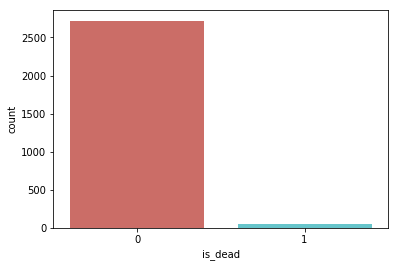

In [95]:
sb.countplot(x='is_dead',data=df, palette='hls');

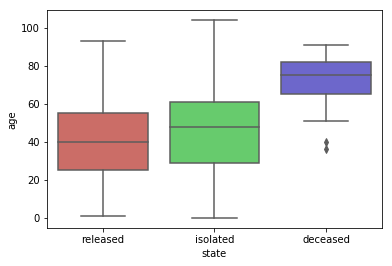

In [96]:
sb.boxplot(x='state', y='age', data=df, palette='hls');

In [97]:
# Now we'll save the data we worked with. and we'll continue in another notebook
df.to_csv('./kovid19-korea-processed.csv')